## 微分

- $ f(x) = \text{常數} \implies f'(x) = 0 $

- 次方：$ f(x) = x^n \implies f'(x) = nx^{n-1} $

- 函數：$ f(x) = Cg(x) \implies f'(x) = Cg'(x) $

- 兩個函數：$ f(x) = g(x) + h(x) \implies f'(x) = g'(x) + h'(x) $

- 乘積：
  $ \frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) $

- 商：
  $ r(x) = \frac{s(x)}{t(x)} \implies r'(x) = \frac{s'(x)t(x) - s(x)t'(x)}{[t(x)]^2} $

- 連鎖律(Chain Rule)：
  $ \frac{d}{dx}[o(i(x))] = o'(i(x)) \cdot i'(x) $

### 練習1：一般微分
$ f(x) = x^4 + 3x^3 + x^2 + x + 1  $

In [3]:
import sympy as sp
from IPython.display import display, Math
x = sp.symbols('x')
f1 = x ** 4 + 3 *x ** 3 + x ** 2 + x + 1
f1_diff = sp.diff(f1, x)
display(Math(sp.latex(f1)))
display(Math(sp.latex(f1_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 微分
$ g(x) = e^x + \ln(x)$


In [4]:
x = sp.symbols('x')
f2 = sp.exp(x) + sp.ln(x)
f2_diff =  sp.diff(f2,x)
display(Math(sp.latex(f2)))
display(Math(sp.latex(f2_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 練習2：乘法法則
$h(x) = (x^2 + 1)(x^3 + x)$

In [5]:
f3 = (x ** 2 + 1) * (x ** 3 + x)
f3_diff = sp.diff(f3,x)
display(Math(sp.latex(f3)))
display(Math(sp.latex(f3_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 練習4：除法法則
$k(x) = \frac{x^3 + x}{x + 1}$

In [6]:
f5 = (x **3 + x) / (x + 1)
f5_diff = sp.diff(f5,x)
display(Math(sp.latex(f5)))
display(Math(sp.latex(f5_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 練習5：連鎖律
$ m(x) = (x^2 + 1)^3 $

In [7]:
f6 = (x ** 2 + 1) ** 3
f6_diff = sp.diff(f6,x)
display(Math(sp.latex(f6)))
display(Math(sp.latex(f6_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 偏微分

### 一般偏微分
$ f(x, y) = x^2 + 3xy + y^2 $

In [8]:
import sympy as sp
from IPython.display import display, Math
x,y = sp.symbols('x y')
f1 = x ** 2 + 3*x*y + y **2
f1_diff_x = sp.diff(f1,x)
f1_diff_y = sp.diff(f1,y)
display(Math(sp.latex(f1)))
display(Math(sp.latex(f1_diff_x)))
display(Math(sp.latex(f1_diff_y)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 乘法法則
$ j(x, y) = (x^2 + 1)(y + x) $


In [9]:
f4 = (x ** 2 + 1) * (y + x)
f4_diff_x = sp.diff(f4,x)
f4_diff_y = sp.diff(f4,y)
display(Math(sp.latex(f4)))
display(Math(sp.latex(f4_diff_x)))
display(Math(sp.latex(f4_diff_y)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

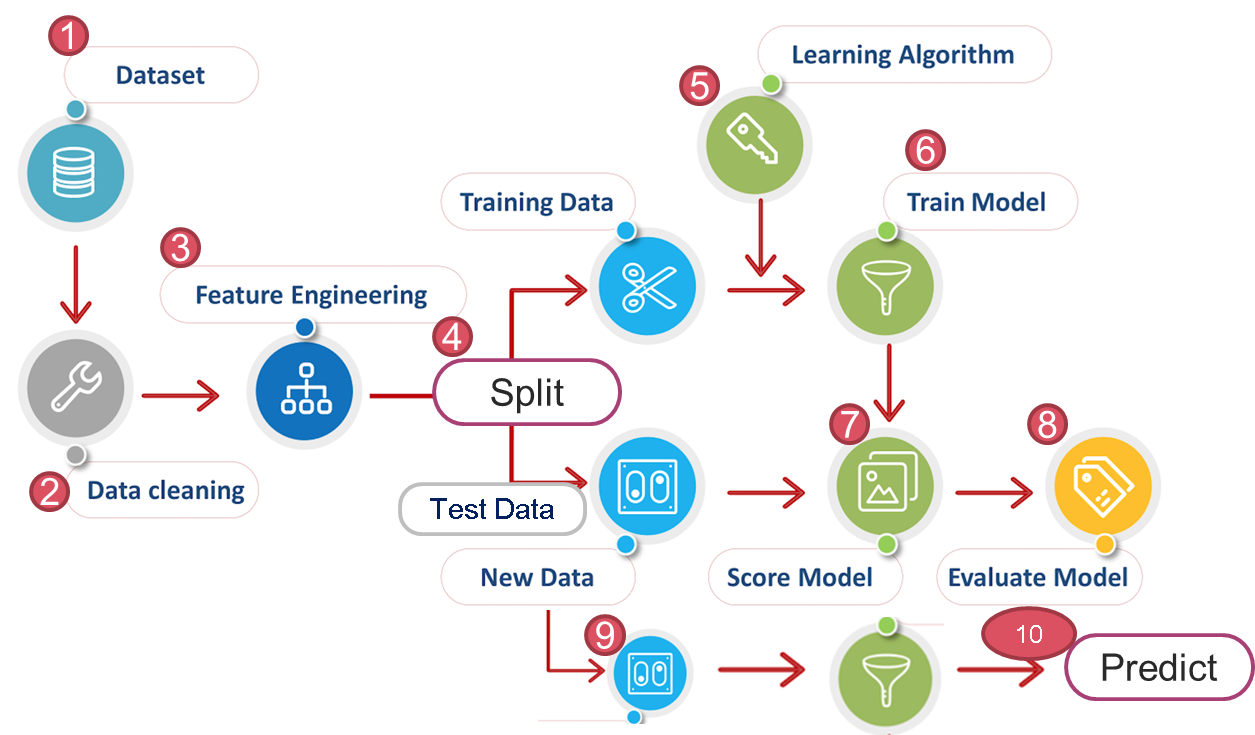

# 處理異常值

在統計學中，異常值是一個明顯不同於其他觀測值的數據點。異常值可能是由測量的變異性引起的，也可能表示實驗誤差；後者有時會從數據集中排除。異常值可能會在統計分析中引起嚴重問題。

記住，即使數據點是異常值，它仍然是一個數據點！在決定是否移除異常值時，請仔細考慮你的數據、其來源以及你的目標。每個情況都是不同的！

## 課程目標
* 了解異常值的不同數學定義
* 使用 Python 工具來識別和移除異常值

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Generating Data

In [11]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [12]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

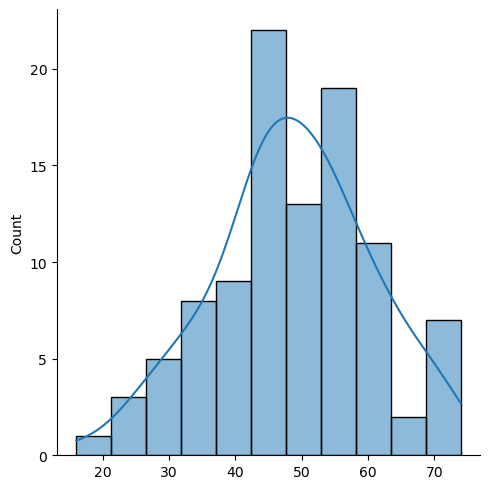

In [13]:
sns.displot(sample,kde=True)

<Axes: >

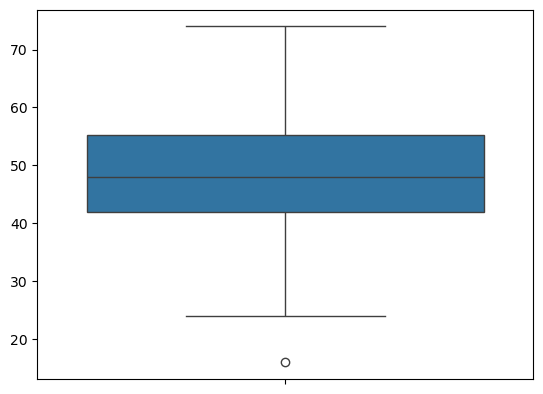

In [15]:
sns.boxplot(sample)

In [16]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

## 根據領域知識修剪或修正

如果我們知道我們正在處理的數據集與投票年齡（美國為 18 歲）有關，那麼將所有小於 18 歲的數據點要么刪除，要么將其修正為 18 歲是有意義的。

In [ ]:
ser[ser >18].describe()

count    99.000000
mean     48.989899
std      11.408460
min      24.000000
25%      42.500000
50%      48.000000
75%      55.500000
max      74.000000
dtype: float64

In [18]:
def fix_value(age):
    if age < 18:
        return 18
    else:
        return age
    

In [19]:
ser.apply(fix_value).describe()



count    100.000000
mean      48.680000
std       11.766139
min       18.000000
25%       42.000000
50%       48.000000
75%       55.250000
max       74.000000
dtype: float64

## Ames Data Set

在 Ames 房屋資料集中，我們來探索一下是否有任何極端的離群值。

In [22]:
df = pd.read_csv("./Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


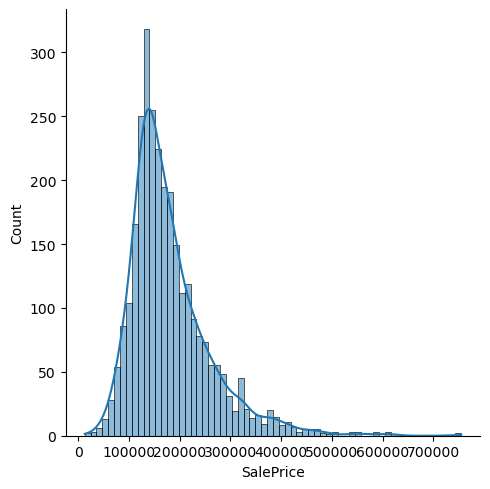

In [23]:
sns.displot(data=df["SalePrice"],kde=True)

<Axes: >

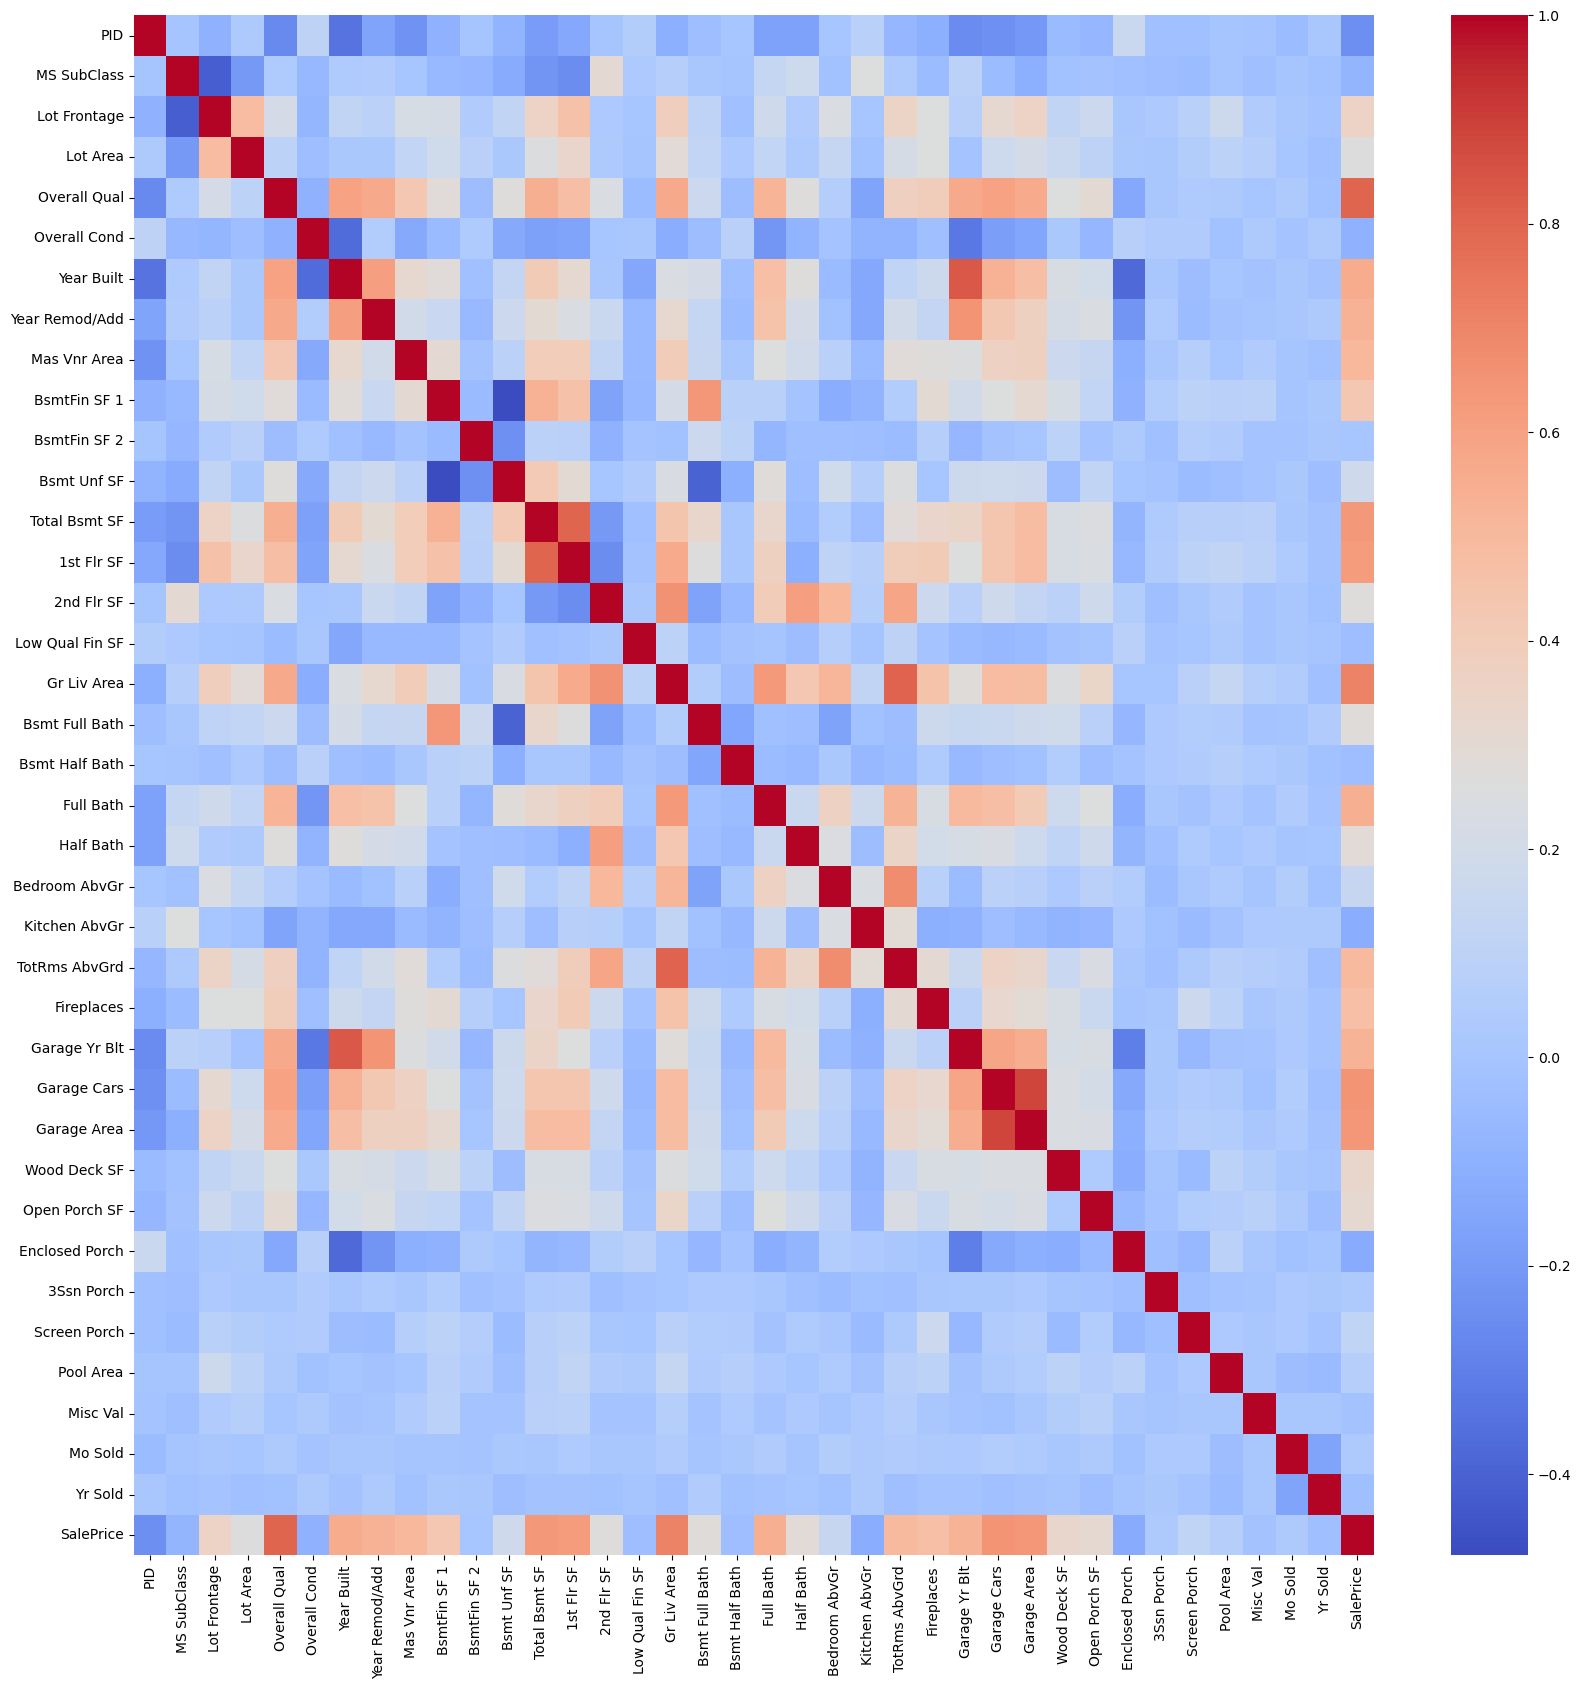

In [29]:
number_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(20,20))
sns.heatmap(number_df.corr(),annot=False,cmap="coolwarm")

In [33]:
number_df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

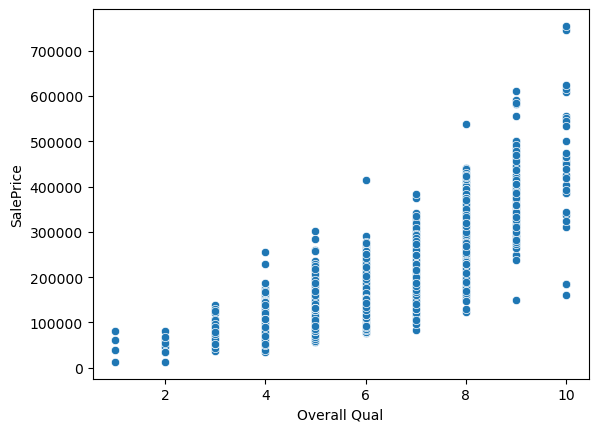

In [34]:
sns.scatterplot(x="Overall Qual",y="SalePrice",data=df)

散佈圖，展示了「Overall Qual」（整體質量）與「SalePrice」（銷售價格）之間的關係。從圖中可以看出以下幾點：

1. **正相關**：
   - 圖中的數據點顯示出整體質量與銷售價格之間有明顯的正相關關係。隨著整體質量（Overall Qual）的提高，銷售價格（SalePrice）也呈現上升趨勢。
   
2. **趨勢明顯**：
   - 大多數數據點隨著整體質量的增加而上升，這表明房屋的質量越高，價格越高。

3. **分布**：
   - 整體質量較低（1-4）時，銷售價格較低且分布相對分散。
   - 整體質量中等（5-7）時，銷售價格相對穩定且分布較集中。
   - 整體質量較高（8-10）時，銷售價格較高，但分布範圍較大，顯示出一些異常值或極端高價。

4. **異常值**：
   - 在整體質量為10的情況下，有幾個銷售價格明顯高於其他數據點，這些可能是異常值或極端高價的房屋。

In [35]:
df[(df["Overall Qual"] > 8) & (df["SalePrice"] < 200000) ]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

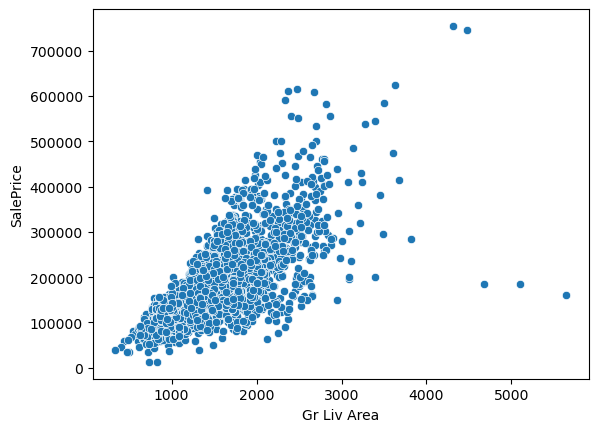

In [36]:
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df)


In [ ]:
df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400000) ]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
